# Binarização e Morfologia

Prof. Dr. Gustavo Resque  
MSc. Tiago Araújo

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import *
import cv2

In [303]:
### Utilitário de ajuda para plotar os gráficos e imagens
def get_ax(rows=1, cols=1, figsize=(4,4), dpi=100, img_mode=True):
    fig, axes = plt.subplots(figsize=figsize, dpi = dpi, nrows=rows, ncols=cols)
    plt.tight_layout()
    if img_mode:
        if rows == 1 and cols == 1:
            axes.clear()
            axes.get_xaxis().set_visible(False)
            axes.get_yaxis().set_visible(False)
        else:
            for ax in axes:
                if (isinstance(ax,np.ndarray)):
                    for a in ax:
                        a.clear()
                        a.get_xaxis().set_visible(False)
                        a.get_yaxis().set_visible(False)   
                else:
                    ax.clear()
                    ax.get_xaxis().set_visible(False)
                    ax.get_yaxis().set_visible(False)
    return axes

# Imagem binária

In [29]:
def mostrar_imagens(path):
    axes = get_ax(1,3, figsize=(8,2))
    
    colorida = cv2.imread(path,1) # 1 colorida
    cinza = cv2.imread(path,0) # 0 escala de cinza
    
    pb = np.where(cinza < 128, 0, 255)
    axes[0].imshow(cv2.cvtColor(colorida, cv2.COLOR_BGR2RGB))
    axes[1].imshow(cinza,cmap='gray')
    axes[2].imshow(pb,cmap='gray')

<IPython.core.display.Javascript object>


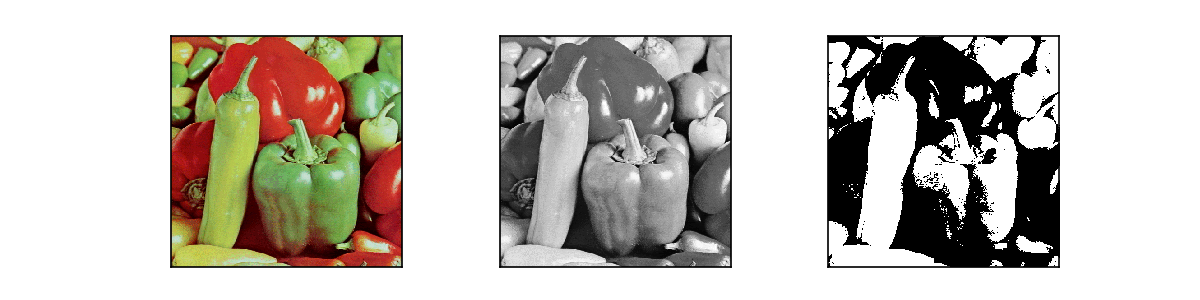

In [30]:
mostrar_imagens('dataset/peppers.tif')

# Thresholding (Limiarização)

In [36]:
def interactiveThresh(path):
    axes = get_ax(1,2, figsize=(8,2))
    
    cinza = cv2.imread(path,0)
    axes[0].imshow(cinza,cmap='gray')
    slider = IntSlider(min=10,max=250,step=10,value=130,description='Limiar')
    
    def update(args):
        pb = np.where(cinza < slider.value, 0, 255)
        axes[1].imshow(pb,cmap='gray')
    
    update(None)
    slider.observe(update, names='value')
    display(slider)

<IPython.core.display.Javascript object>


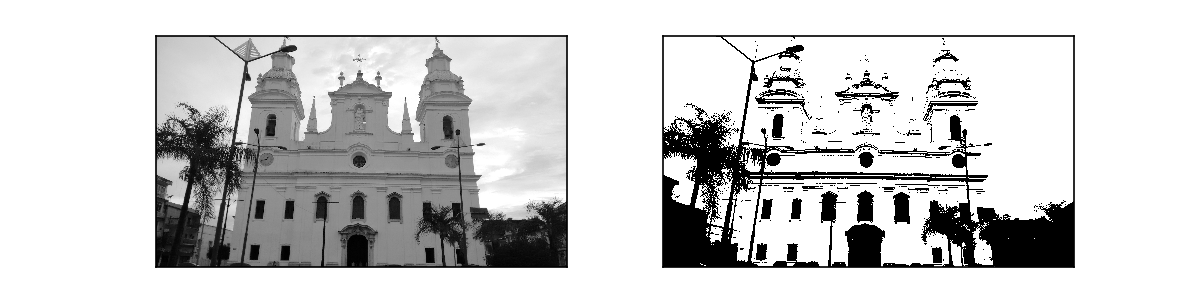

IntSlider(value=130, description='Limiar', max=250, min=10, step=10)

In [38]:
interactiveThresh('dataset/igrejase.jpg')

# Limiarização Automática 

* Limiarização de OTSU
* Limiarização Adaptativa

In [107]:
def interactiveautomaticthresh(path):
    axes = get_ax(1,4, figsize=(9,2))
    
    cinza = cv2.imread(path,0)
    axes[0].imshow(cinza,cmap='gray')
    axes[0].set_title('Original');axes[1].set_title('Manual')
    axes[2].set_title('Otsu');axes[3].set_title('Adaptativo')
    
    slider = IntSlider(min=10,max=250,step=10,value=130,description='Limiar')
    slider_bloco = IntSlider(min=3,max=101,step=8,value=11,description='Tamanho Bloco')
    slider_C = IntSlider(min=0,max=10,step=1,value=2,description='C')
    
    limiar = widgets.HTML(value="",description='Limiar')
    
    def update(args):
        pb = np.where(cinza < slider.value, 0, 255)
        axes[1].imshow(pb,cmap='gray')
        
        adaptive = cv2.adaptiveThreshold(cinza,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, slider_bloco.value, slider_C.value)
        axes[3].imshow(adaptive, cmap='gray')
        
    th1, otsu = cv2.threshold(cinza, 128, 255, cv2.THRESH_OTSU)
    axes[2].imshow(otsu,cmap='gray')
    
    update(None)
    limiar.value = 'Otsu = ' + str(th1) #+ '| Adaptativo = ' + str(th2)
    slider.observe(update, names='value')
    slider_bloco.observe(update, names='value')
    slider_C.observe(update, names='value')
    
    display(slider);display(slider_bloco)
    display(slider_C);display(limiar)

<IPython.core.display.Javascript object>


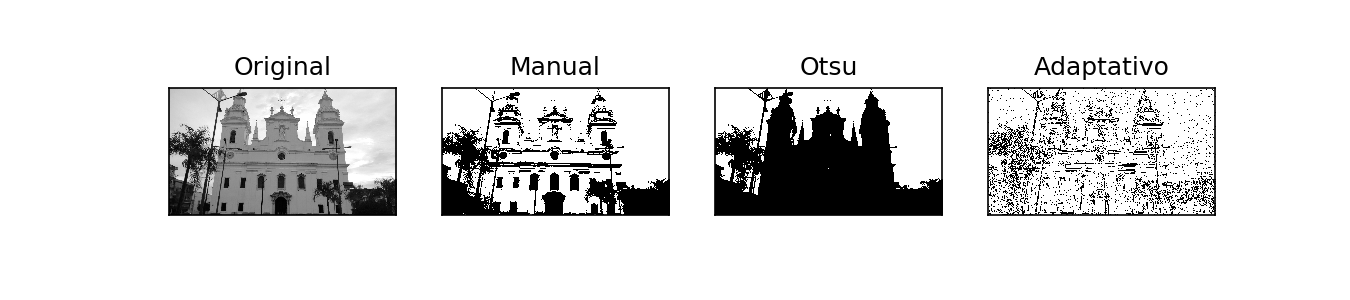

IntSlider(value=130, description='Limiar', max=250, min=10, step=10)

IntSlider(value=11, description='Tamanho Bloco', max=101, min=3, step=8)

IntSlider(value=2, description='C', max=10)

HTML(value='Otsu = 162.0', description='Limiar')

In [108]:
interactiveautomaticthresh('dataset/igrejase.jpg')

# Semilimiarização e limiarização por intervalos

In [171]:
def semiintervallimiar(path):
    axes = get_ax(1,4, figsize=(9,2))
    
    cinza = cv2.imread(path,0)
    axes[0].imshow(cinza,cmap='gray')
    axes[0].set_title('Original');axes[1].set_title('Semi - fundo')
    axes[2].set_title('Semi - frente');axes[3].set_title('Intervalo')
    
    slider = IntRangeSlider(min=0,max=255,step=10,value=(50,200),description='Limiar')
    limiar = widgets.HTML(value="",description='Limiar')
    
    def update(args):
        minint = cinza > slider.value[0]
        maxint = cinza < slider.value[1]
        interval = np.where( minint & maxint, 255, 0)
        axes[3].imshow(interval, cmap='gray')
        
    th1, otsu = cv2.threshold(cinza, 128, 255, cv2.THRESH_OTSU)
    axes[1].imshow( otsu & cinza,cmap='gray')
    axes[2].imshow( cinza & (255-otsu),cmap='gray')
    
    update(None)
    limiar.value = 'Otsu = ' + str(th1) 
    slider.observe(update, names='value')
    
    display(slider);display(limiar)

<IPython.core.display.Javascript object>


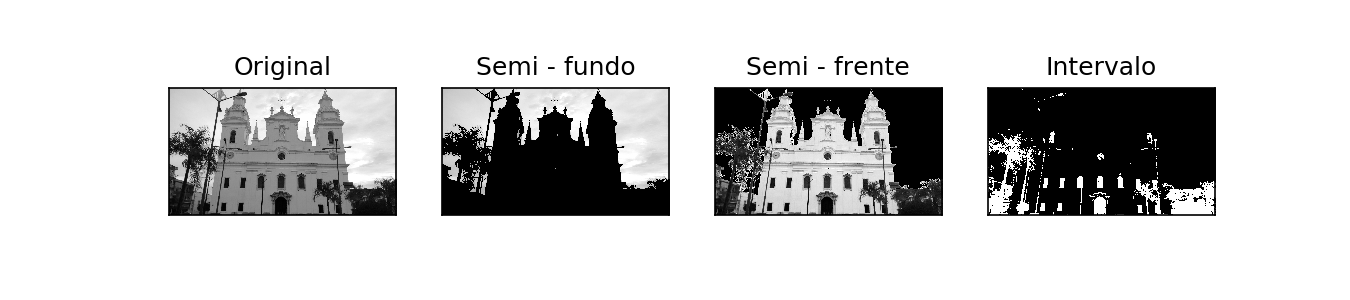

IntRangeSlider(value=(50, 200), description='Limiar', max=255, step=10)

HTML(value='Otsu = 162.0', description='Limiar')

In [172]:
semiintervallimiar('dataset/igrejase.jpg')

# Rotulando Componentes

In [270]:
def rotulos(path):
    axes = get_ax(1,4, figsize=(9,2))
    cinza = cv2.imread(path,0)
    th, imbin = cv2.threshold(cinza,127,255,cv2.THRESH_OTSU)
    
    h, w = cinza.shape[:2]
    slider = IntSlider(min=1,max=10,step=1,value=3,description='Alcance')
    text = Text(description='Ponto', value='0,0')

    axes[0].imshow(cinza, cmap='gray')
    axes[1].imshow(imbin, cmap='gray')
    
    axes[0].set_title('Original');axes[1].set_title('Binária')
    axes[2].set_title('Máscara');axes[3].set_title('Retirado')
    
    def update(args):

        points = text.value.split(',')
        if len(points) == 2:
            if points[0].isdigit() and points[1].isdigit():
                x, y = int(points[0]), int(points[1])
                mask = np.zeros((h + 2, w + 2), np.uint8)
                retval, image, maskaf, rect = cv2.floodFill(cinza.copy(), mask, (x, y), slider.value,slider.value, 255)
                axes[2].imshow(maskaf, cmap='gray')
                axes[3].imshow(image, cmap='gray')

    update(None)
    slider.observe(update)
    text.observe(update)
    display(slider)
    display(text)

<IPython.core.display.Javascript object>


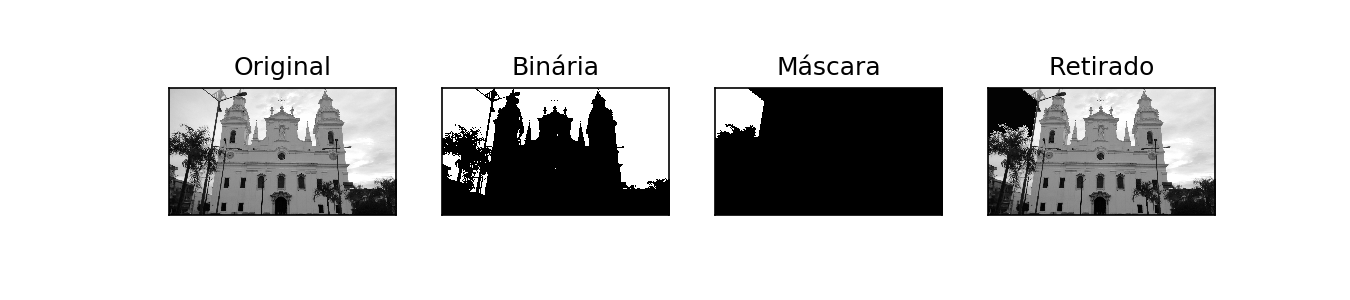

IntSlider(value=3, description='Alcance', max=10, min=1)

Text(value='0,0', description='Ponto')

In [271]:
rotulos('dataset/igrejase.jpg')

# Operações Morfológicas

In [306]:
def morph(path):
    axes = get_ax(3,2, figsize=(6,5))
    img = cv2.imread(path,0)
    th, imbin = cv2.threshold(img,127,255,cv2.THRESH_OTSU)
    
    axes[0][0].imshow(img,cmap='gray');axes[0][1].imshow(imbin,cmap='gray');
    
    axes[0][0].set_title('Original'); axes[0][1].set_title('Binária');
    axes[1][0].set_title('Dilatação');axes[1][1].set_title('Erosão');
    axes[2][0].set_title('Abertura'); axes[2][1].set_title('Fechamento');
    
    slider = IntSlider(min=1,max=15,step=2,value=3,description='Tamanho K')
    slider_it = IntSlider(min=1,max=5,step=1,value=1,description='Iterações')
    
    def update(args):
        kernel = np.ones((slider.value,slider.value), dtype=np.uint8)
        dilat = cv2.morphologyEx(imbin, cv2.MORPH_DILATaE, kernel,iterations=slider_it.value)
        erod = cv2.morphologyEx(imbin, cv2.MORPH_ERODE, kernel,iterations=slider_it.value)
        opening = cv2.morphologyEx(imbin, cv2.MORPH_OPEN, kernel,iterations=slider_it.value)
        closing = cv2.morphologyEx(imbin, cv2.MORPH_CLOSE, kernel,iterations=slider_it.value)
        axes[1][0].imshow(dilat,cmap='gray')  ; axes[1][1].imshow(erod,cmap='gray');
        axes[2][0].imshow(opening,cmap='gray'); axes[2][1].imshow(closing,cmap='gray');
    
    update(None);slider.observe(update);display(slider);slider_it.observe(update);display(slider_it)

<IPython.core.display.Javascript object>


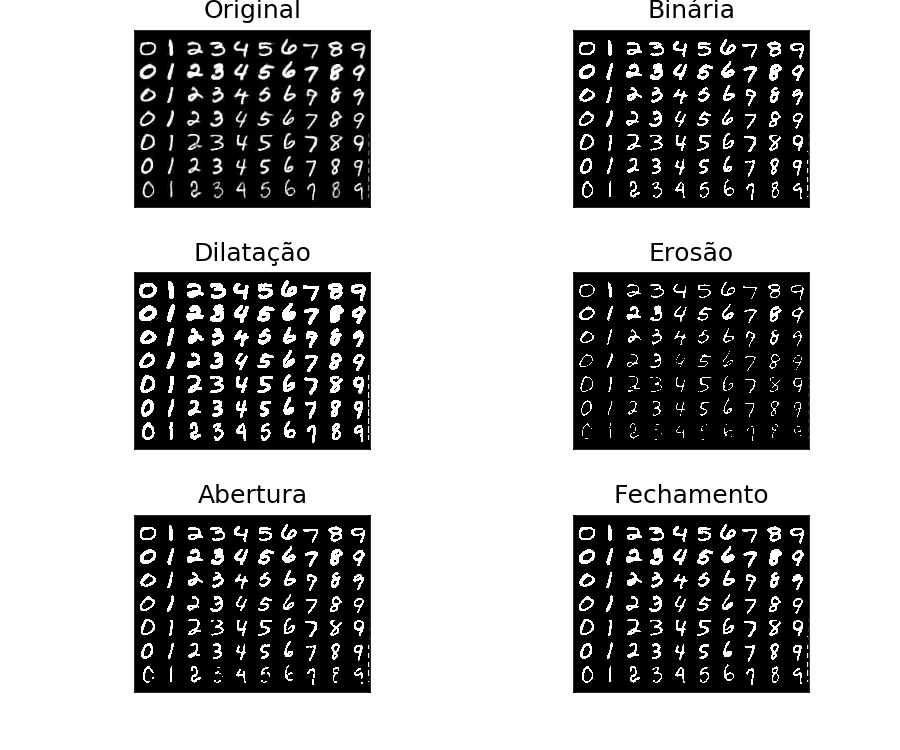

IntSlider(value=3, description='Tamanho K', max=15, min=1, step=2)

IntSlider(value=1, description='Iterações', max=5, min=1)

In [307]:
morph('dataset/mnist_example.jpg')